For external validation, we use three differnet metrics.

1. Purity

Purity evaluates whether each cluster contains only examples from the same class:

\begin{array}
AU = \sum_{i}p_{i}(max_{j}\frac{p_{ij}}{p_{i}})&\end{array}

In the expressions above, $p_{i} = n_{i}/n, p_{j} = n_{j}/n$, and $p_{ij} = n_{ij}/n$, where $n_{ij}$ is the number of examples belonging to the class i found in the cluster j and $n_{i}(n_{j})$ is the number of examples in the cluster i(j).


2. Adjusted rand index

 Given a set S of n elements, and two groupings or
partitions (e.g.clusterings) of these elements, namely X = {$X_{1},X_{2},...,X_{r}$} and Y = {$Y_{1},Y_{2},...,Y_{r}$}, the overlap between X and Y can be
summarized in a contingency table [$n_{ij}$].

Let $a_{1}$ = sum($n_{1j}$), a2 = sum($n_{2j}$), b1 = sum($n_{i1}$), b2 = sum($n_{i2}$), etc.

\begin{array}{c|cccc|c}{{} \atop X}\!\diagdown \!^{Y}&Y_{1}&Y_{2}&\cdots &Y_{s}&{\text{sums}}\\\hline X_{1}&n_{11}&n_{12}&\cdots &n_{1s}&a_{1}\\X_{2}&n_{21}&n_{22}&\cdots &n_{2s}&a_{2}\\\vdots &\vdots &\vdots &\ddots &\vdots &\vdots \\X_{r}&n_{r1}&n_{r2}&\cdots &n_{rs}&a_{r}\\\hline {\text{sums}}&b_{1}&b_{2}&\cdots &b_{s}&\end{array}


The Adjusted Rand Index using the Permutation Model is (where $n_{ij}$, $a_{i}$, $b_{j}$ are values from the contingency table). The ARI should be interpreted
as follows: ARI >= 0.90 excellent recovery; 0.80 =< ARI < 0.90 good recovery; 0.65 =< ARI < 0.80 moderate recovery; ARI < 0.65 poor recovery.

\begin{array}
AARI = \frac{\sum_{i}^{j}\binom{n_{ij}}{2}-[\sum_{i}\binom{a_{i}}{2}\sum_{j}\binom{b_{j}}{2}]/\binom{n}{2}}{
\frac{1}{2}[\sum_{i}\binom{a_{i}}{2}+\sum_{j}\binom{b_{j}}{2}]-[\sum_{i}\binom{a_{i}}{2}\sum_{j}\binom{b_{j}}{2}]/\binom{n}{2}}
&\end{array}

3. Mutual information

Mutual information allows us to measure the the re-
duction in uncertainty about the clustering results given
knowledge of the prior partition:

\begin{array}
AMI = \sum_{i}\sum_{j}p_{ij}log\frac{p_{ij}}{p_{i}p_{j}}&\end{array}

As always, $p_{ij} = n_{ij}/n, p_{i} = n_{i}/n,$ and $p_{j} = n_{j}/n.$

TASK 1

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from mpl_toolkits.mplot3d import Axes3D, proj3d
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score, contingency_matrix

2. Implement functions

In [2]:
# Elbow method

def elbow(df):

  ks = range(1,10)
  inertias = []

  for k in ks:
      model = KMeans(n_clusters=k)
      model.fit(df)
      inertias.append(model.inertia_)

  plt.figure(figsize=(5, 5))
  plt.plot(ks, inertias, '-o')
  plt.xlabel('number of clusters, k')
  plt.ylabel('inertia')
  plt.xticks(ks)

  plt.show()

# K-means clustering

def k_means(n, df):
  
  clust_model = KMeans(n_clusters = n, n_init=100, max_iter=1000)
  clust_model.fit(df) 

  pred = clust_model.predict(df) 

  cluster_df = df.copy()
  cluster_df['cluster'] = pred

  X = cluster_df

  return X

# Plot(3D) the data points according to the original class

def org_show(df):

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = df.Class
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

  plt.show()

# Plot(3D) the data points according to the class allocated by each clustering algorithm

def clust_show(X):

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

  plt.show()

# Find purity score for external evaluation

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    c_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(c_matrix, axis=0)) / np.sum(c_matrix)

Dataset 1

1. Upload file

In [3]:
uploaded = files.upload()

Saving Data1.csv to Data1.csv


2. Convert to dataframe

In [4]:
df = pd.read_csv("Data1.csv")
display(df.head())
np.sum(pd.isnull(df))

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1


Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

3. Find k for k-means clustering using elbow method

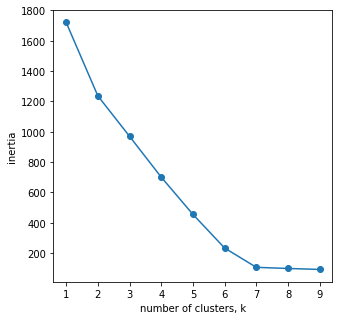

In [5]:
df_r1 = df.drop(columns=["Unnamed: 0", "Class"])

elbow(df_r1)

4. Apply k-means clustering (k=7) and plot the data points

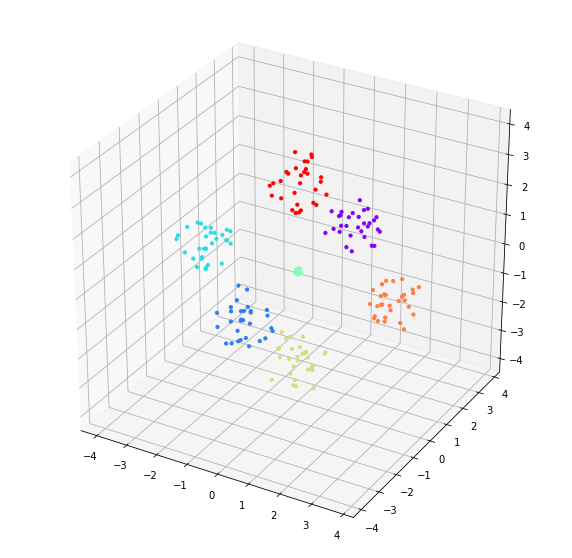

In [6]:
X = k_means (7, df_r1)
clust_show(X)

5. Plot the data points accoring to the original class

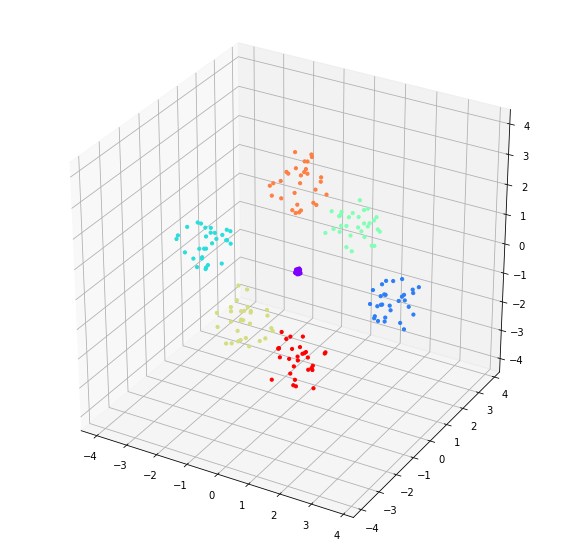

In [7]:
df_r2 = df.drop(columns=["Unnamed: 0"])
org_show(df_r2)

6. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [8]:
purity_score(df_r2.Class, X.cluster)

1.0

In [9]:
adjusted_rand_score(df_r2.Class, X.cluster)

1.0

In [10]:
mutual_info_score(df_r2.Class, X.cluster)

1.9456472294419214

7. Draw a dendrogram to find k for hierarchical clustering

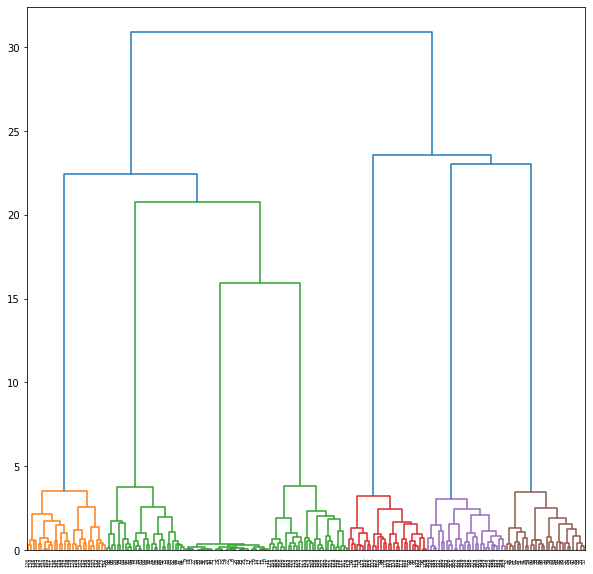

In [12]:
df_r3 = df_r1.copy()

linked = hierarchy.linkage(df_r3, 'ward')
plt.figure(figsize=(10, 10))
hierarchy.dendrogram(linked,orientation='top', show_leaf_counts=True)
plt.show()

8. Apply hierarchical clustering (k=7) and plot the data points

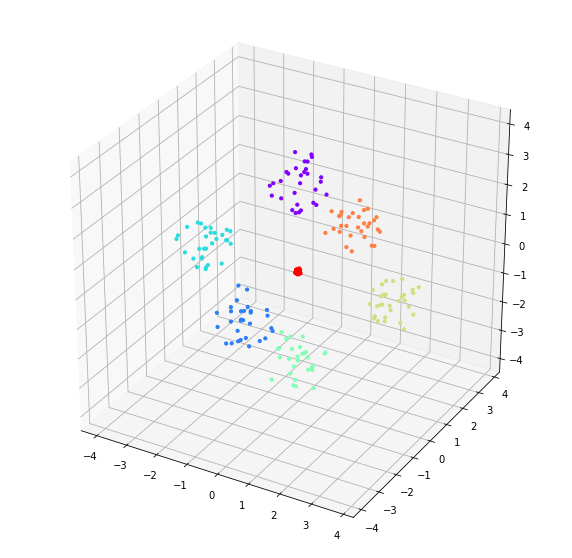

In [13]:
hier = AgglomerativeClustering(n_clusters = 7, affinity = "euclidean", linkage = "ward")
hier.fit_predict(df_r3)
df_r3['cluster'] = hier.labels_
Y = df_r3

clust_show(Y)

9. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [14]:
purity_score(df_r2.Class, Y.cluster)

1.0

In [15]:
adjusted_rand_score(df_r2.Class, Y.cluster)

1.0

In [16]:
mutual_info_score(df_r2.Class, Y.cluster)

1.9456472294419216

Dataset 2

1. Upload file

In [17]:
uploaded = files.upload()

Saving Data2.csv to Data2.csv


2. Convert to dataframe

In [18]:
df = pd.read_csv("Data2.csv")
display(df.head())
np.sum(pd.isnull(df))

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1


Unnamed: 0    0
X             0
Y             0
C             0
Class         0
dtype: int64

3. Find k for k-means clustering

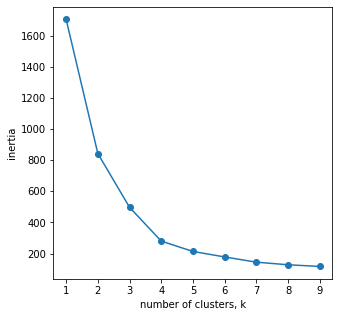

In [19]:
df_r1 = df.drop(columns=["Unnamed: 0", "Class"])

elbow(df_r1)

4. Apply k-means clustering (k=4) and plot the data points

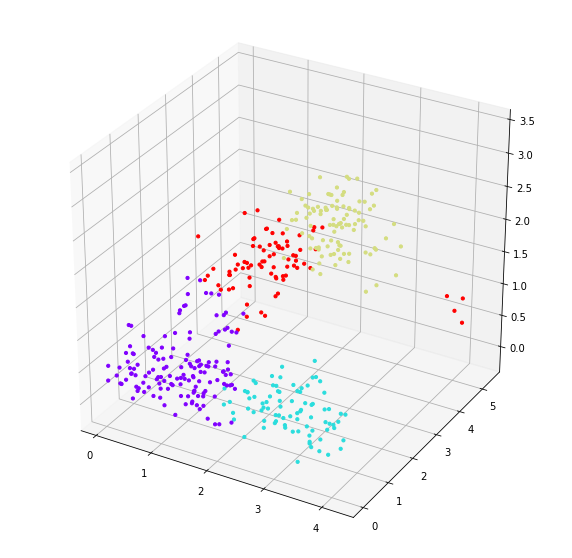

In [20]:
X = k_means (4, df_r1)
clust_show(X)

5. Plot the data points accoring to the original class

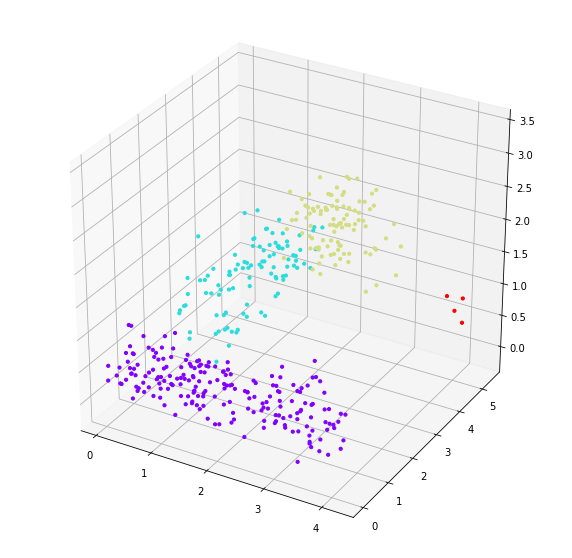

In [21]:
df_r2 = df.drop(columns=["Unnamed: 0"])
org_show(df_r2)

6. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [22]:
purity_score(df_r2.Class, X.cluster)

0.9306930693069307

In [23]:
adjusted_rand_score(df_r2.Class, X.cluster)

0.5877644016112638

In [24]:
mutual_info_score(df_r2.Class, X.cluster)

0.886436141171525

7. Draw a dendrogram to find k for hierarchical clustering

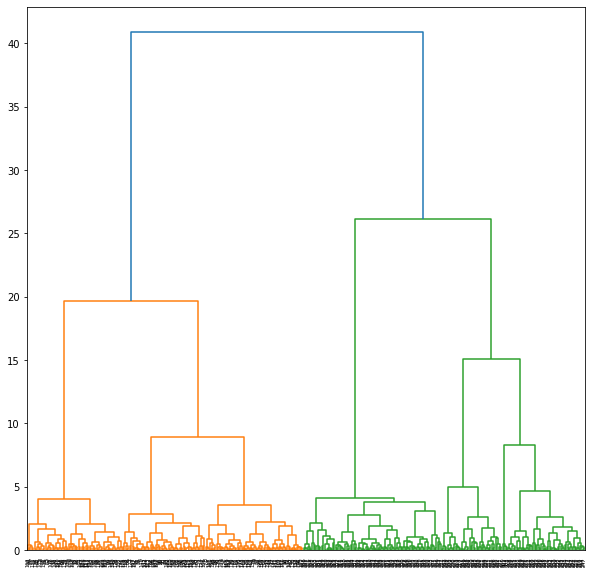

In [26]:
df_r3 = df_r1.copy()

linked = hierarchy.linkage(df_r3, 'ward')
plt.figure(figsize=(10, 10))
hierarchy.dendrogram(linked,orientation='top', show_leaf_counts=True)
plt.show()

8. Apply hierarchical clustering (k=4) and plot the data points

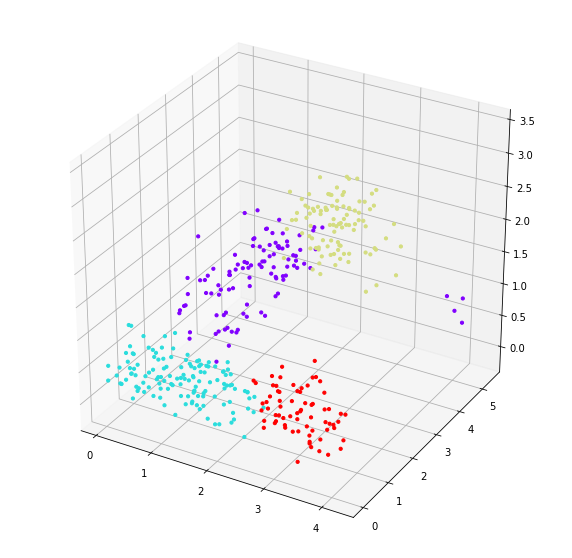

In [27]:
df_r3 = df_r1.copy()

hier = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
hier.fit_predict(df_r3)
df_r3['cluster'] = hier.labels_
Y = df_r3

clust_show(Y)

9. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [28]:
purity_score(df_r2.Class, Y.cluster)

0.9900990099009901

In [29]:
adjusted_rand_score(df_r2.Class, Y.cluster)

0.7339089891331867

In [30]:
mutual_info_score(df_r2.Class, Y.cluster)

1.0430061021712511

Dataset 3

1. Upload file

In [31]:
uploaded = files.upload()

Saving Data3.csv to Data3.csv


2. Convert to dataframe

In [32]:
df = pd.read_csv("Data3.csv")
display(df.head())
np.sum(pd.isnull(df))

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1


Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

3. Find k for k-means clustering

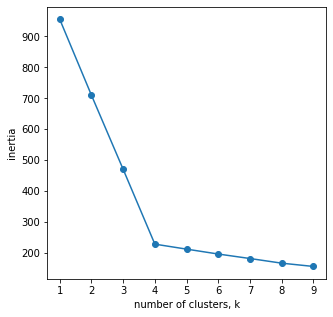

In [33]:
df_r1 = df.drop(columns=["Unnamed: 0", "Class"])

elbow(df_r1)

4. Apply k-means clustering (k=4) and plot the data points

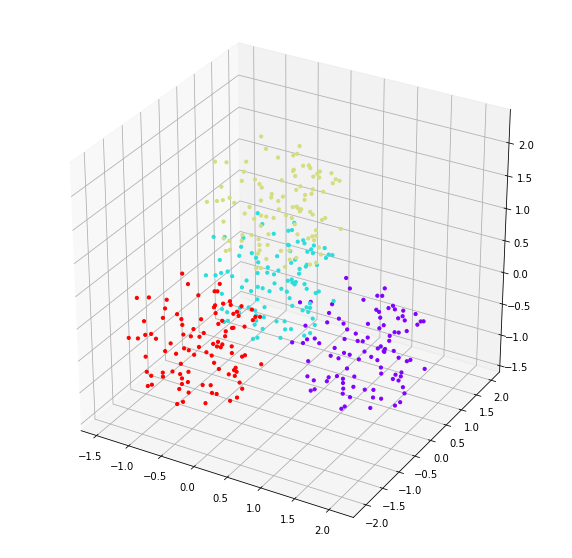

In [34]:
X = k_means (4, df_r1)
clust_show(X)

5. Plot the data points accoring to the original class

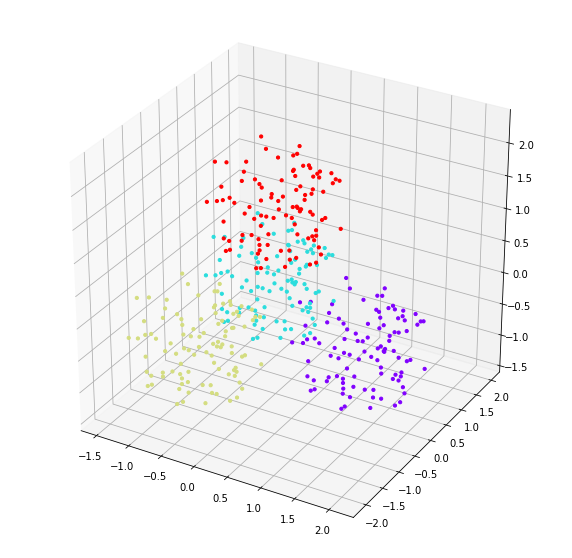

In [35]:
df_r2 = df.drop(columns=["Unnamed: 0"])
org_show(df_r2)

6. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [36]:
purity_score(df_r2.Class, X.cluster)

1.0

In [37]:
adjusted_rand_score(df_r2.Class, X.cluster)

1.0

In [38]:
mutual_info_score(df_r2.Class, X.cluster)

1.38629436111989

7. Draw a dendrogram to find k for hierarchical clustering

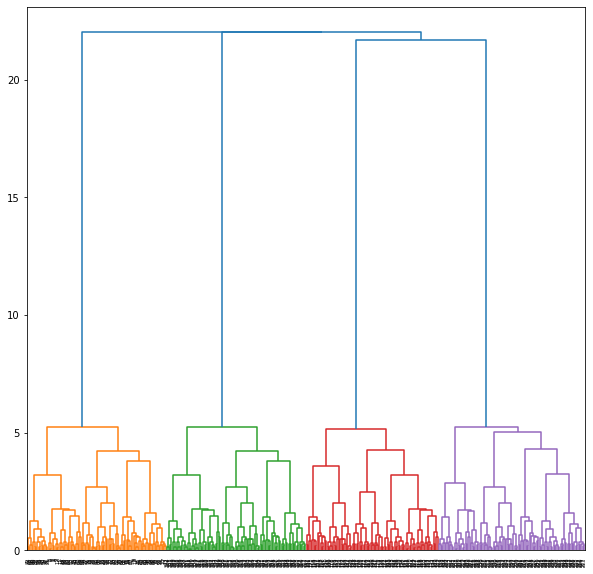

In [39]:
df_r3 = df_r1.copy()

linked = hierarchy.linkage(df_r3, 'ward')
plt.figure(figsize=(10, 10))
hierarchy.dendrogram(linked,orientation='top', show_leaf_counts=True)
plt.show()

8. Apply hierarchical clustering (k=4) and plot the data points

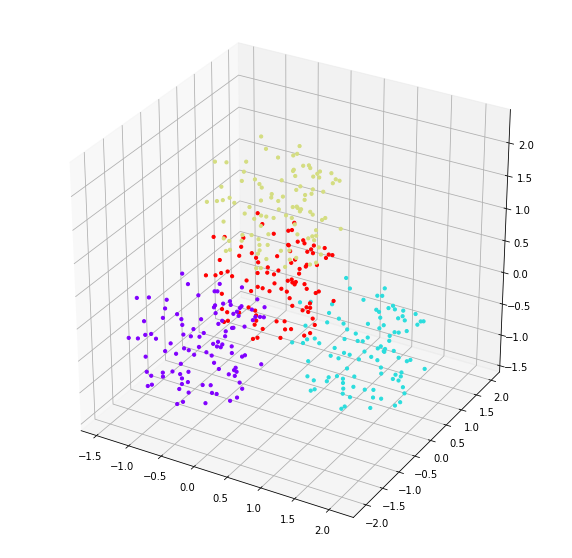

In [40]:
df_r3 = df_r1.copy()

hier = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
hier.fit_predict(df_r3)
df_r3['cluster'] = hier.labels_
Y = df_r3

clust_show(Y)

9. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [41]:
purity_score(df_r2.Class, Y.cluster)

0.9875

In [42]:
adjusted_rand_score(df_r2.Class, Y.cluster)

0.9672676330087653

In [43]:
mutual_info_score(df_r2.Class, Y.cluster)

1.3360402896059898

Dataset 4

1. Upload file

In [44]:
uploaded = files.upload()

Saving Data4.csv to Data4.csv


2. Convert to dataframe

In [45]:
df = pd.read_csv("Data4.csv")
display(df.head())
np.sum(pd.isnull(df))

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.4530,-0.891,0.02300,1
1,2,0.6530,-0.846,0.02110,1
2,3,0.3980,0.913,-0.00139,1
3,4,0.0952,1.050,0.00628,1
4,5,0.5240,-0.941,0.03780,1


Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

3. Find k for k-means clustering

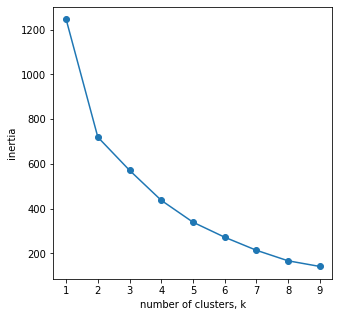

In [46]:
df_r1 = df.drop(columns=["Unnamed: 0", "Class"])

elbow(df_r1)

4. Apply k-means clustering (k=6) and plot the data points

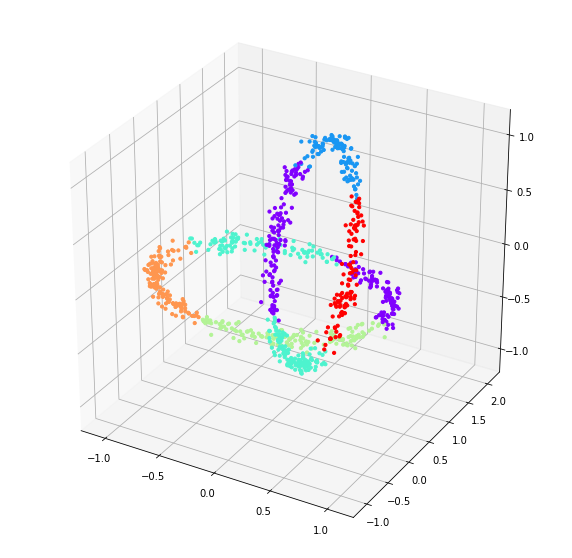

In [47]:
X = k_means (6, df_r1)
clust_show(X)

5. Plot the data points accoring to the original class

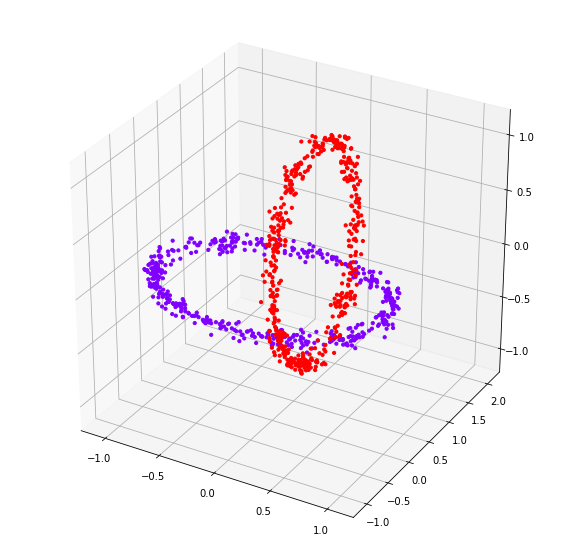

In [48]:
df_r2 = df.drop(columns=["Unnamed: 0"])
org_show(df_r2)

6. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [49]:
purity_score(df_r2.Class, X.cluster)

0.792

In [50]:
adjusted_rand_score(df_r2.Class, X.cluster)

0.13997480319525718

In [51]:
mutual_info_score(df_r2.Class, X.cluster)

0.364743167018392

7. Draw a dendrogram to find k for hierarchical clustering

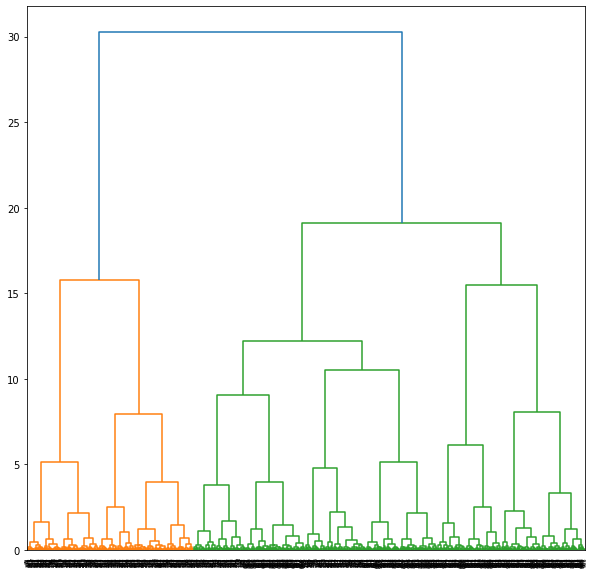

In [52]:
df_r3 = df_r1.copy()

linked = hierarchy.linkage(df_r3, 'ward')
plt.figure(figsize=(10, 10))
hierarchy.dendrogram(linked,orientation='top', show_leaf_counts=True)
plt.show()

8. Apply hierarchical clustering (k=6) and plot the data points

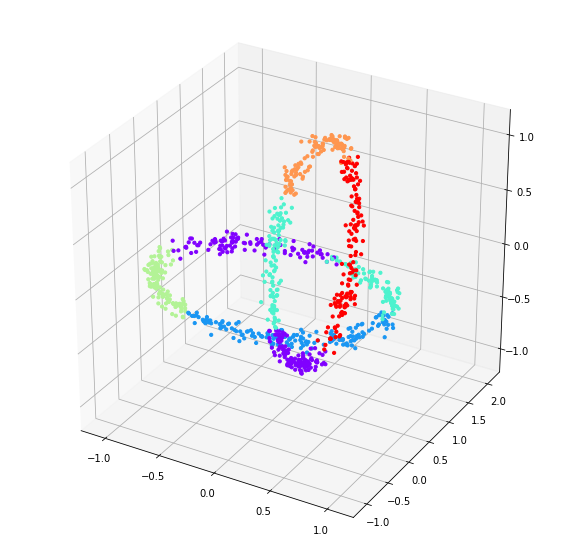

In [53]:
df_r3 = df_r1.copy()

hier = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")
hier.fit_predict(df_r3)
df_r3['cluster'] = hier.labels_
Y = df_r3

clust_show(Y)

9. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [54]:
purity_score(df_r2.Class, Y.cluster)

0.799

In [55]:
adjusted_rand_score(df_r2.Class, Y.cluster)

0.16251219230972985

In [56]:
mutual_info_score(df_r2.Class, Y.cluster)

0.39227388572609745

Dataset 5

1. Upload file

In [57]:
uploaded = files.upload()

Saving Data5.csv to Data5.csv


2. Convert to dataframe

In [58]:
df = pd.read_csv("Data5.csv")
display(df.head())
np.sum(pd.isnull(df))

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1


Unnamed: 0    0
X1            0
X2            0
X3            0
Class         0
dtype: int64

3. Find k for k-means clustering

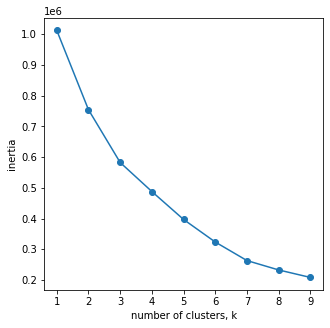

In [59]:
df_r1 = df.drop(columns=["Unnamed: 0", "Class"])

elbow(df_r1)

4. Apply k-means clustering (k=7) and plot the data points

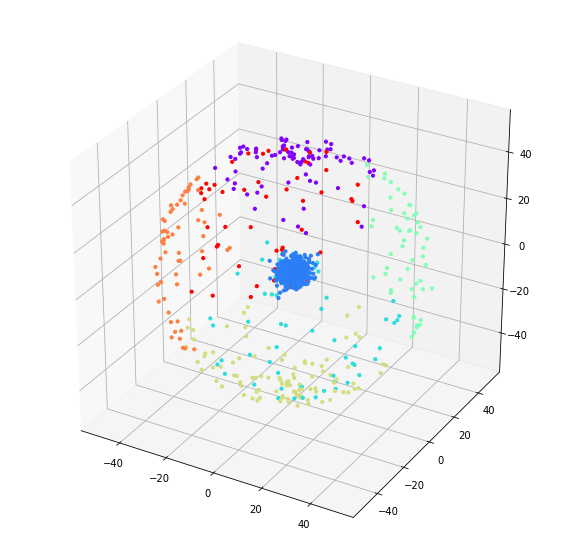

In [60]:
X = k_means (7, df_r1)
clust_show(X)

5. Plot the data points accoring to the original class

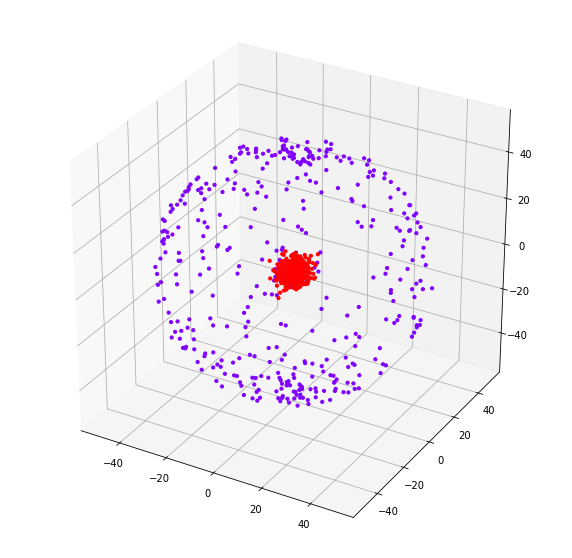

In [61]:
df_r2 = df.drop(columns=["Unnamed: 0"])
org_show(df_r2)

6. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [62]:
purity_score(df_r2.Class, X.cluster)

1.0

In [63]:
adjusted_rand_score(df_r2.Class, X.cluster)

0.5879659574850888

In [64]:
mutual_info_score(df_r2.Class, X.cluster)

0.6931471805599453

7. Draw a dendrogram to find k for hierarchical clustering

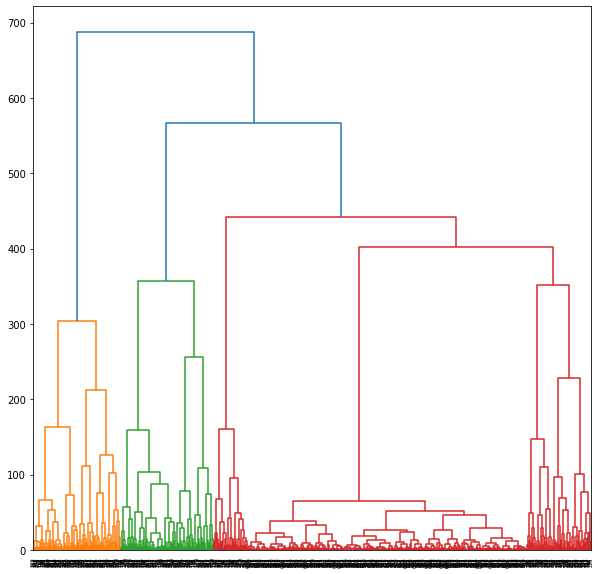

In [65]:
df_r3 = df_r1.copy()

linked = hierarchy.linkage(df_r3, 'ward')
plt.figure(figsize=(10, 10))
hierarchy.dendrogram(linked,orientation='top', show_leaf_counts=True)
plt.show()

8. Apply hierarchical clustering (k=7) and plot the data points

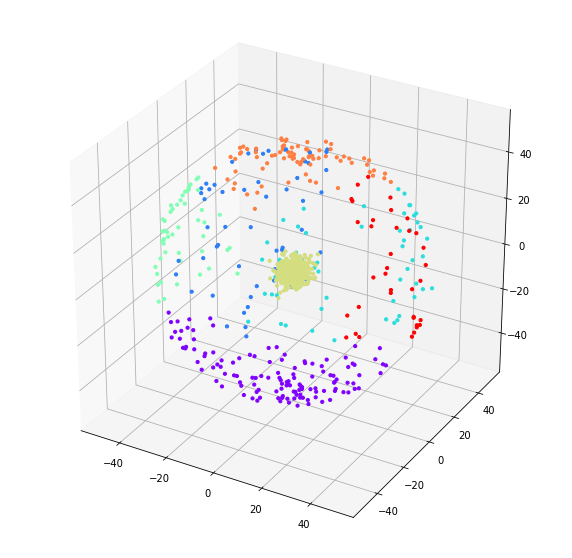

In [66]:
df_r3 = df_r1.copy()

hier = AgglomerativeClustering(n_clusters = 7, affinity = "euclidean", linkage = "ward")
hier.fit_predict(df_r3)
df_r3['cluster'] = hier.labels_
Y = df_r3

clust_show(Y)

9. Evaluate the performance using external validation metrics (Purity, Adjusted Rand Index, Mutual Information)

In [67]:
purity_score(df_r2.Class, Y.cluster)

1.0

In [68]:
adjusted_rand_score(df_r2.Class, Y.cluster)

0.5988781980695154

In [69]:
mutual_info_score(df_r2.Class, Y.cluster)

0.6931471805599454

TASK 2

In KMeans Clustering, we used SSE, which is the inertia_ attribute of KMeans, to draw the elbow graph

$$SSE(C_i) = \sum_{x \in C_i} d(c_i,x)^2 = = 1/(2m_i) \sum_{x \in C_i}\sum_{y \in C_i} d(x,y)^2$$

where x is an example in the cluster, $c_i$ is a cluster representative and $m_i$ is the number of examples in Cluster $C_i$

For internal validation, we use three differnet metrics.

1.Calisnki-Harabasz coefficient
$$ CH= \frac{\frac{SSB_M}{(M-1)}}{\frac{SSE_M}{(M)}}$$

where $SSB=\sum_{i=1}^{K} m_i d(c_i,c)^2 = 1/(2K) \sum_{i=1}^{K}\sum_{i=1}^{K} \frac{m}{K} d(c_i,c_j)^2$, $c_i$ is the mean of the ith cluster and c is the overall mean,

2.The Dunn index
$$D = min_{1<i<k} \left \{ min_{1<j<k,i \neq j}  \left \{ \frac{\delta \left ( Ci,Cj \right )} {max_{1<l<k}\left \{  \Delta \left ( Ci \right )\right \}} \right \} \right \}$$

$$\Delta \left ( Ci \right ) = max_{x,y \in c_i} \{d(x,y)\}  $$

$$\delta (C_i,C_j) = min_{x\in C_i, y\in C_j} \{d(x,y)\}  $$

3.The silhouette coefficient
(1)For each example, the average distance a(i) to all the examples in the same cluster is computed:
$$ a(i) = \frac {1}{|C_a|} \sum_{j \in C_a , i \neq j} d(i,j)
$$

(2)For each example, the minimum average distance b(i) between the example and the examples contained in each cluster not containing the analyzed example:
$$ b(i) = min_{C_b \neq C_a} \frac {1}{|C_b|} \sum_{j \in C_b} d(i,j)
$$

(3)For each example, the silhouette coefficient is determined by the following expression:
$$ s(i) = \frac {b(i) - a(i)}{ max \{ a(i),b(i) \} }
$$

The silhouette coefficient is defined in the interval [-1,1] for each example in our data set. The global silhouette coefficient is just the average of the particular silhouette coefficients for each example:
$$ S = \frac{1}{n} \sum_{i=1}^n s(i) 
$$





Step1:Data Cleaning

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from sklearn import metrics
import missingno as mno
from sklearn import linear_model

In [ ]:
#Colaboratory upload dataset
# uploaded = files.upload()
# df = pd.read_csv("Data1.csv")

In [57]:
# Load and check the Data 
#jupyter notebook upload dataset
#df = pd.read_csv("/Users/xiexiaoyang/Documents/NEU learning/Fall-2022/IE 5374/after midtern/Preject 1/World Indicators.csv")
df=pd.read_csv("/Users/cathy/Desktop/Neu DAE/IE5374/project1/World Indicators.csv")
display(df.head(5))
display(df.info())

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

None

In [5]:
import sklearn
sklearn.__version__

'1.1.3'

In [14]:
# Step 1-1 Remove the "%", "$" in the object feature and 
df_column=df.columns
df[df_column] = df[df_column].replace({'\$':''}, regex = True)
df[df_column] = df[df_column].replace({'%':''}, regex = True)
df[df_column] = df[df_column].replace({',':''}, regex = True)

# Step 1-2 Encode "Region" feature to categorical feature
from sklearn.preprocessing import OneHotEncoder
encode=OneHotEncoder(sparse=False)
Region_column = df[['Region']] 
Region_encoded=encode.fit_transform(Region_column)
feature_names = encode.get_feature_names_out(input_features=["Region"])
Region_encoded = pd.DataFrame(Region_encoded, columns=feature_names)
df[feature_names]=Region_encoded
df.head(10)

# Step 1-3 Convert the object data to float
df_convert=df.apply(pd.to_numeric,errors="coerce")
df_convert = df_convert.drop(["Region","Country"],axis=1)
display(df_convert.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    float64
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    float64
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    float64
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

None

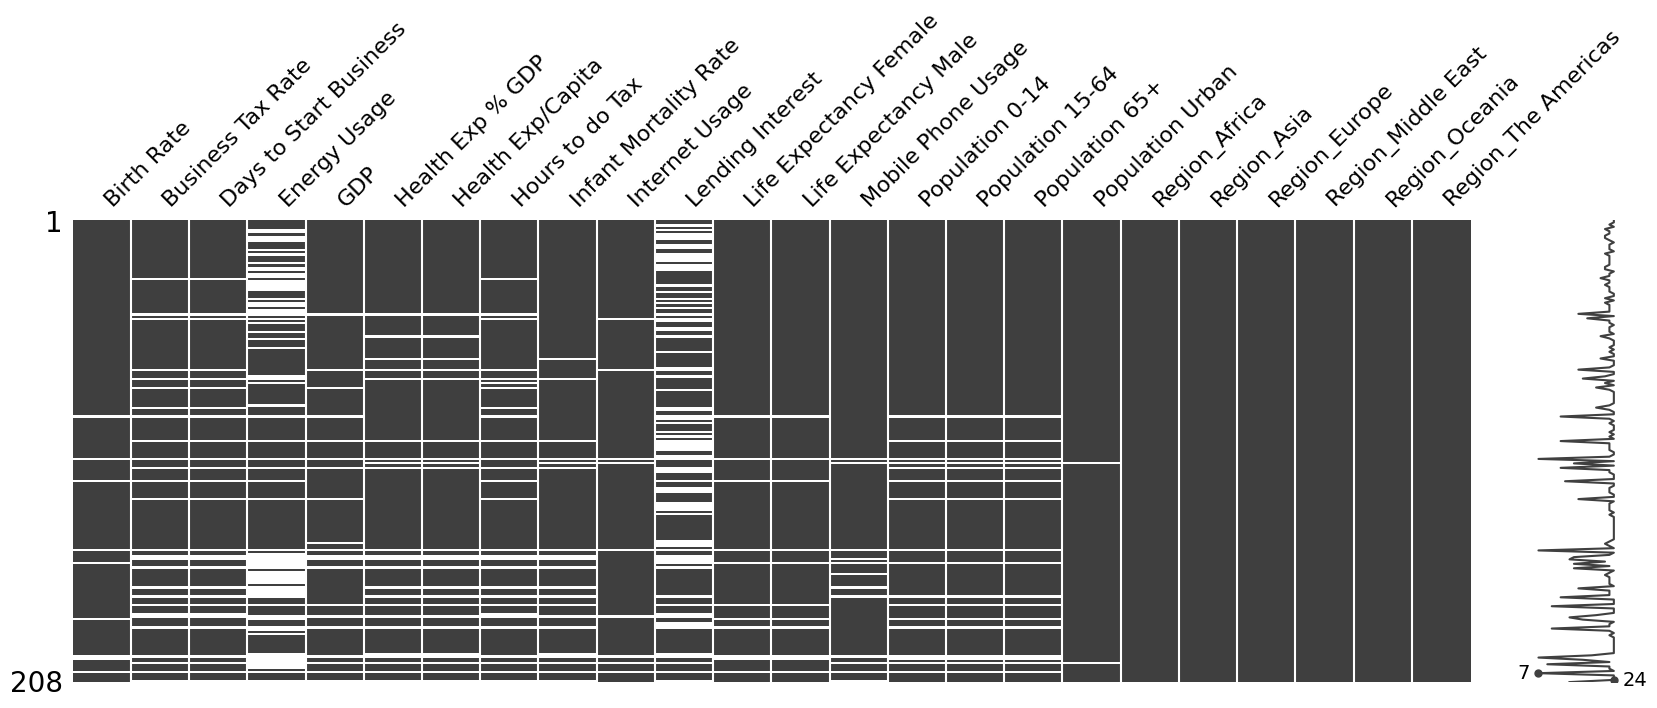

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region_Africa             0
Region_Asia               0
Region_Europe             0
Region_Middle East        0
Region_Oceania            0
Region_The Americas       0
dtype: int64

In [15]:
# Step 1-4 Check the null values and removed the columns with null values more than 30%

mno.matrix(df_convert, figsize = (20, 6))
plt.show()

# Remove column"Energy Usage" and "Lending Interest"
df_convert = df_convert.drop(["Energy Usage","Lending Interest"],axis=1)

# Step 1-5 Deal with the Null values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100,random_state=0)

column_after_encode=df_convert.columns
df_imputed=pd.DataFrame(imp.fit_transform(df_convert),columns=column_after_encode)
df_imputed.isnull().sum()

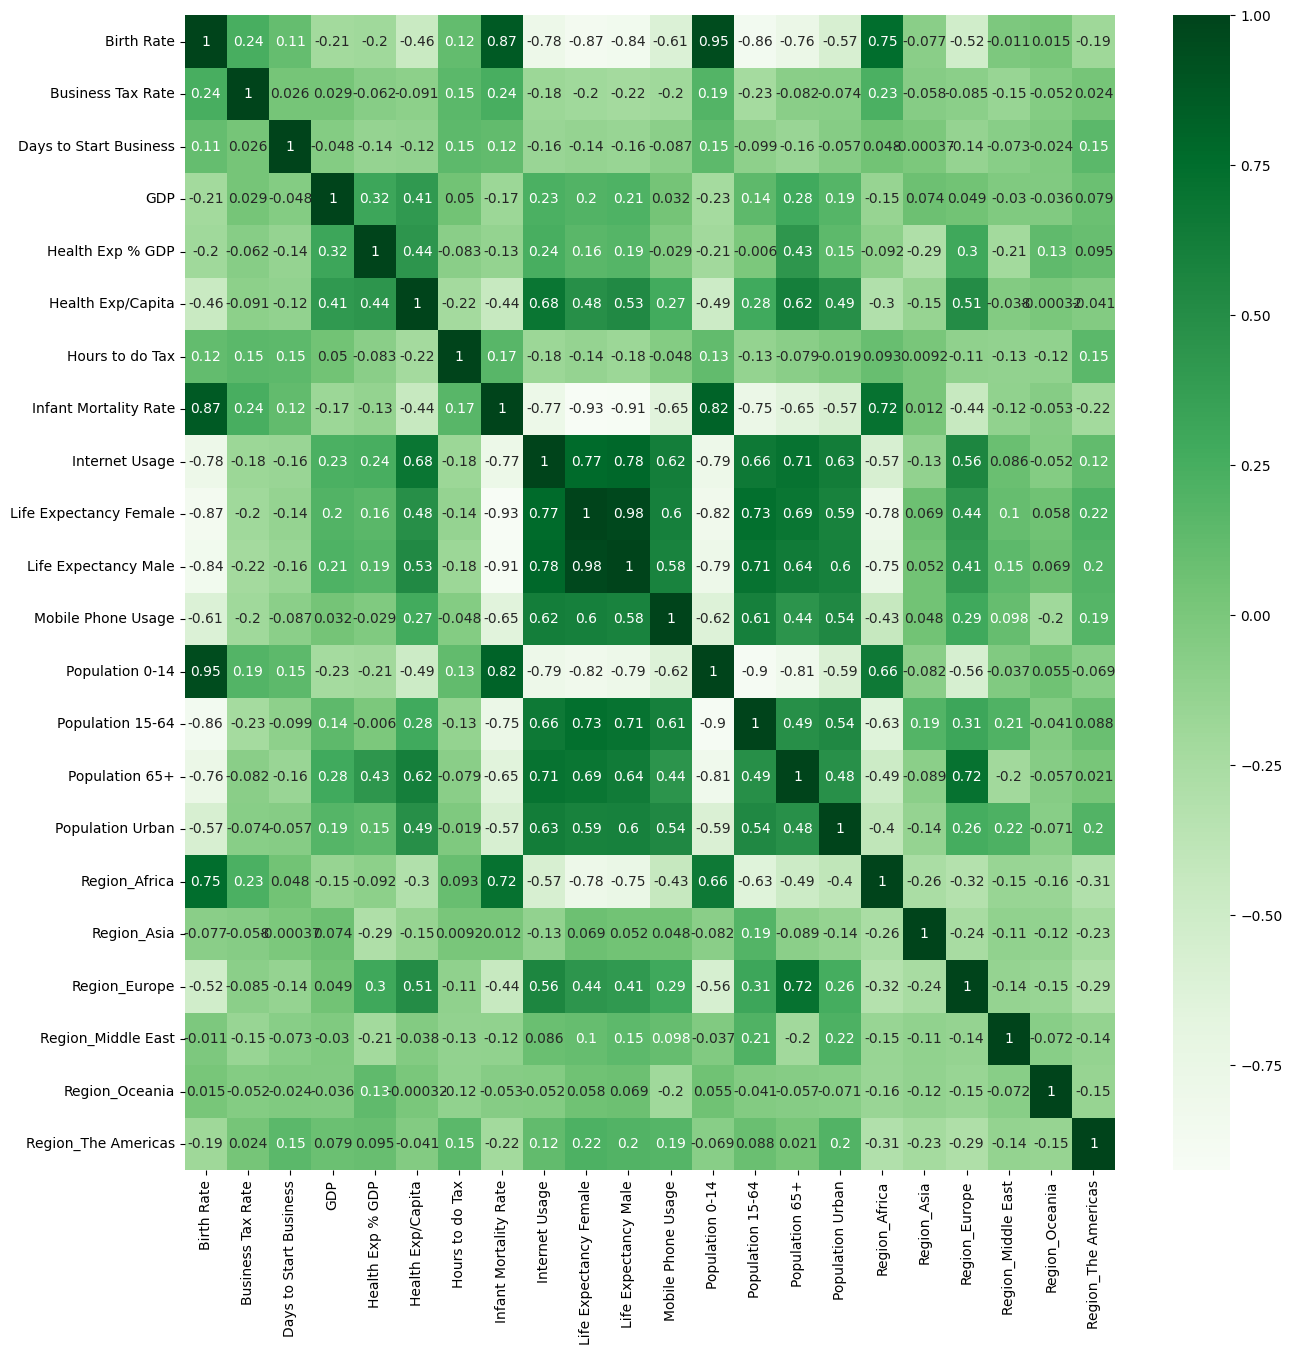

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Business Tax Rate       208 non-null    float64
 1   Days to Start Business  208 non-null    float64
 2   GDP                     208 non-null    float64
 3   Health Exp % GDP        208 non-null    float64
 4   Health Exp/Capita       208 non-null    float64
 5   Hours to do Tax         208 non-null    float64
 6   Infant Mortality Rate   208 non-null    float64
 7   Internet Usage          208 non-null    float64
 8   Life Expectancy Female  208 non-null    float64
 9   Mobile Phone Usage      208 non-null    float64
 10  Population 15-64        208 non-null    float64
 11  Population 65+          208 non-null    float64
 12  Population Urban        208 non-null    float64
dtypes: float64(13)
memory usage: 21.2 KB


None

In [54]:
# Step 1-5 Calculate the paired correlation and determine the features used in the future clustering
fig=plt.subplots(figsize=(15,15))
sns.heatmap(df_imputed.corr(),cmap='Greens',annot=True)
plt.show()

# Removed the "duplicated" features with high correlation which are "Birth Rate", "Population 0-14" and "Life Expectancy Male"
# According to our experiment, the categorical feature-Region have no affect on the clustering. We get the same clustering result with or without region.
# In order to be more concise, we remove region feature in this step.
df_removed = df_imputed.drop(["Birth Rate","Population 0-14","Life Expectancy Male","Region_Africa","Region_Asia","Region_Europe","Region_Middle East","Region_Oceania","Region_The Americas"],axis=1)
display(df_removed.info())

In [23]:
# Step1-6: use Scale and PCA to reduce the dimention 
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_df_removed = df_removed.columns
df_scale=pd.DataFrame(scaler.fit_transform(df_removed),columns=column_df_removed)

# PCA function
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scale)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

pca=PCA(n_components=12)
df_afterpca=pca.fit_transform(df_scale)
columns_df_pca =pca.get_feature_names_out()
df_afpca=pd.DataFrame(df_afterpca,columns=columns_df_pca)
# columns = list(df_removed.iloc[:,0:12])
df_pca = df_afpca.copy()
# df_pca.columns = columns
display(df_pca.head())

[0.42230589 0.12713326 0.09241372 0.0730131  0.06372378 0.05469452
 0.04451754 0.03412253 0.03097116 0.02094235 0.01953517 0.01142707
 0.00519991]
[0.42230589 0.54943915 0.64185286 0.71486596 0.77858975 0.83328427
 0.87780181 0.91192434 0.9428955  0.96383785 0.98337301 0.99480009
 1.        ]


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,0.682787,-0.923094,0.971387,-0.789551,-0.064289,0.485163,0.001890,0.421327,0.618447,0.088594,-0.035350,0.720374
1,4.398298,0.474620,0.104111,0.355610,0.580728,0.226940,1.531139,-0.690916,-0.358237,0.293586,-0.882801,-0.472587
2,3.040075,0.023440,-0.012545,-0.446798,0.321938,0.220212,0.627459,-0.120466,-0.463085,-0.337983,-0.256728,0.203712
3,1.755094,-0.903024,-0.503885,0.830382,0.087512,0.275450,1.443369,0.713118,-1.550251,0.648813,-0.667708,0.283513
4,3.680181,0.792248,-0.732589,-0.038645,-0.291606,-0.032697,0.427339,-0.253725,-0.307511,-0.081541,-0.129356,-0.033432


Problem 1: Use K-means and hierarchical clustering methods to group similar countries together

1-1  K-means Clustering

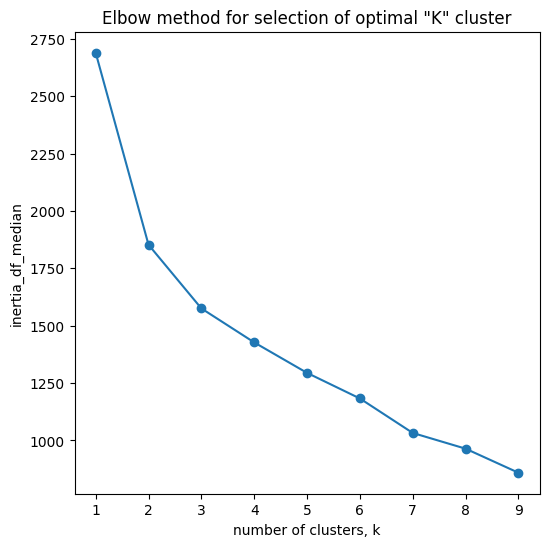

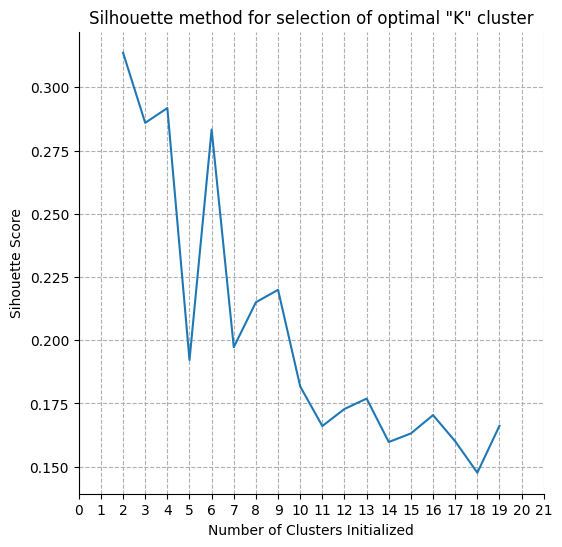

In [27]:
# Use K-means to cluster countries with similar features
# Finding Optimum Value of K. Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(6,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia_df_median')
plt.xticks(ks)
plt.title('Elbow method for selection of optimal "K" cluster')
plt.show()

# The Silhouette method to find the Optimum Value of K
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(df_pca).labels_
    score = metrics.silhouette_score(df_pca, labels)
    scores.append(score)

plt.figure(figsize=(6, 6))
plt.plot(list(range(2,20)),scores)
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.title('Silhouette method for selection of optimal "K" cluster')
sns.despine()


1-2  Hierarchical Clustering

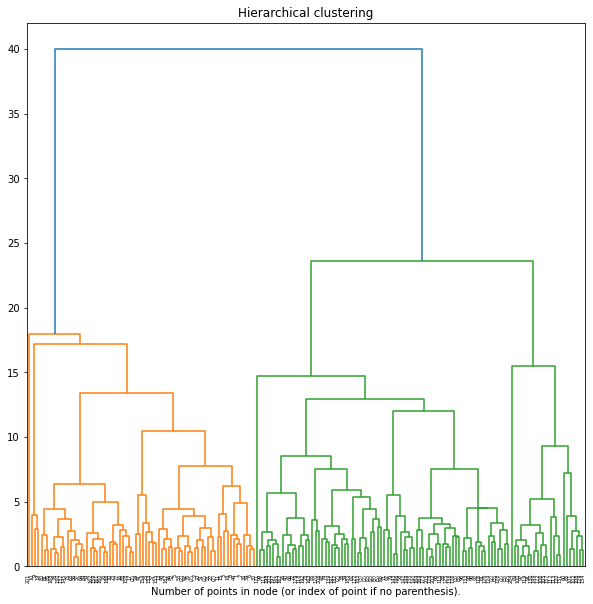

In [91]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_pca)
plt.figure(figsize=(10,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title("Hierarchical clustering")
plt.show()


Problem 2 Use internal validation metrics to report the cluster quality.

We use CH,the Dunn index and the silhouette to report the cluster quality.

In [36]:
#SHS
k_range=range(2,6)
SHS=[]
for i in k_range:
    label=KMeans(n_clusters=i).fit(df_pca).labels_
    shs=metrics.silhouette_score(df_pca,label,metric="euclidean")
    SHS.append(shs)
for i in k_range:
    label=AgglomerativeClustering(n_clusters=i).fit(df_pca).labels_
    shs=metrics.silhouette_score(df_pca,label,metric="euclidean")
    SHS.append(shs)
    
SHS

[0.3136761243841973,
 0.28594339183107537,
 0.2989123848217803,
 0.30243018042967507,
 0.3100333644088744,
 0.27845564306928183,
 0.2827028852190593,
 0.2922858028328728]

In [43]:
#CH
CH=[]
for i in k_range:
    label=KMeans(n_clusters=i).fit(df_pca).labels_
    ch=metrics.calinski_harabasz_score(df_pca,label)
    CH.append(ch)
for i in k_range:
    label=AgglomerativeClustering(n_clusters=i).fit(df_pca).labels_
    ch=metrics.calinski_harabasz_score(df_pca,label)
    CH.append(ch)

CH

[93.04567243830739,
 72.50033540705914,
 61.411156985239614,
 56.49391175349681,
 87.49047568124091,
 68.71445648411871,
 58.284311893547404,
 54.241208872339385]

In [46]:
!pip install validclust

In [47]:
#Dunn
from validclust import dunn
DI=[]
for i in k_range:
    label=KMeans(n_clusters=i).fit(df_pca).labels_
    dist_cohesive = metrics.pairwise_distances(df_pca)
    dunn_cohesive = dunn(dist_cohesive, label)
    DI.append(dunn_cohesive)
for i in k_range:
    label=AgglomerativeClustering(n_clusters=i).fit(df_pca).labels_
    dist_cohesive = metrics.pairwise_distances(df_pca)
    dunn_cohesive = dunn(dist_cohesive, label)
    DI.append(dunn_cohesive)

DI

[0.061715617457346786,
 0.06301628385374496,
 0.07520766123955593,
 0.059845279275652224,
 0.08373187097137624,
 0.08373187097137624,
 0.10355502745759472,
 0.10355502745759472]

In [66]:
data={'CH':CH,'Dunn':DI,'Silhouette':SHS}
k_range=range(2,6)
iterables = [["kmeans", "hierarchical"], k_range]

index=pd.MultiIndex.from_product(iterables, names=["first", "cluster_num"])
df_score=pd.DataFrame(data=data,index=index)
df_score


CH      Dunn  Silhouette
first        cluster_num                                 
kmeans       2            93.045672  0.061716    0.313676
             3            72.500335  0.063016    0.285943
             4            61.411157  0.075208    0.298912
             5            56.493912  0.059845    0.302430
hierarchical 2            87.490476  0.083732    0.310033
             3            68.714456  0.083732    0.278456
             4            58.284312  0.103555    0.282703
             5            54.241209  0.103555    0.292286

Problem 3-1 Report the best clustering solution

Since the largest CH, DI and SI indicate the best cluster solution, we choose the k=2 as the optimal "K" in clustering

Problem 3-2 Give a detailed list of all the groups and the countries included within the groups

In [67]:
#clusters with country names
mdl_2cluster = KMeans(n_clusters=2).fit(df_pca.iloc[:,0:12])
preds = mdl_2cluster.labels_
kmeans_df = df.iloc[:,18:20]
kmeans_df['Cluster'] = preds


print("-------------------------------------------")
print('Number of countries in each clusters: \n'+ str(pd.Series(mdl_2cluster.labels_).value_counts()))

print("-------------------------------------------")
print("detailed list of 3 groups and the countries included within the groups")
cluster0series = df[(mdl_2cluster.labels_ == 0)]
print('Countries in clusters "0":\n',
      cluster0series.iloc[:,19:20])
cluster1series = df[(mdl_2cluster.labels_ == 1)]
print('Countries in clusters "1":\n', 
      str(cluster1series.iloc[:,19:20]))


-------------------------------------------
Number of countries in each clusters: 
0    124
1     84
dtype: int64
-------------------------------------------
detailed list of 3 groups and the countries included within the groups
Countries in clusters "0":
                       Country
14           Egypt, Arab Rep.
26                      Libya
31                  Mauritius
32                    Morocco
40                 Seychelles
..                        ...
203  Turks and Caicos Islands
204             United States
205                   Uruguay
206             Venezuela, RB
207     Virgin Islands (U.S.)

[124 rows x 1 columns]
Countries in clusters "1":
           Country
0         Algeria
1          Angola
2           Benin
3        Botswana
4    Burkina Faso
..            ...
186        Guyana
187         Haiti
188      Honduras
191     Nicaragua
201      Suriname

[84 rows x 1 columns]


Problem 4 Generate 3 different scatter plots and color the data points according to the group

[Text(0.5, 1.0, '[Infant Mortality Rate] vs [GDP]')]

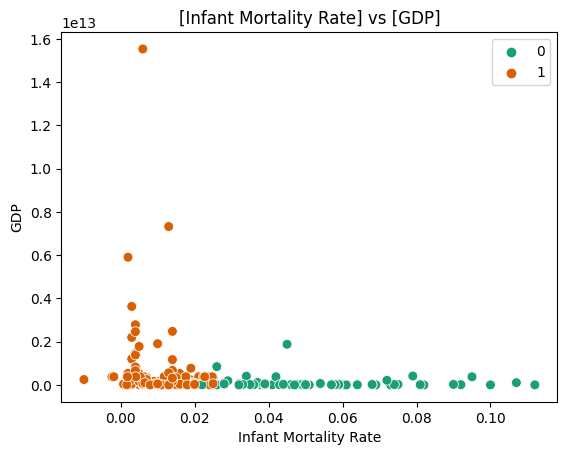

In [63]:
preds = mdl_2cluster.labels_
df_k2 = df_removed.copy()
df_k2['Cluster'] = preds
#display(df_k2)
# 1. "GDP" vs "Infant Mortality Rate"
sns.scatterplot(x='Infant Mortality Rate',y='GDP',hue = preds,data=df_k2, s=50,legend = True, palette='Dark2').set(title='[Infant Mortality Rate] vs [GDP]')

[Text(0.5, 1.0, '[Infant Mortality Rate] vs [Life Expectancy Female]')]

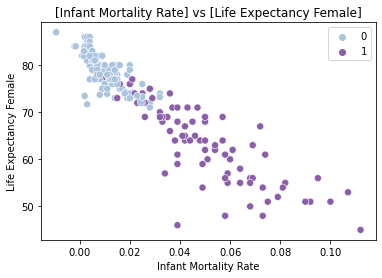

In [120]:
# 2. "Life Expectancy Female" vs "Infant Mortality Rate"
sns.scatterplot(x='Infant Mortality Rate',y='Life Expectancy Female',hue = preds,data=df_k2, s=50,legend = True, palette='BuPu').set(title='[Infant Mortality Rate] vs [Life Expectancy Female]')

[Text(0.5, 1.0, '[Mobile Phone Usage] vs [Internet Usage]')]

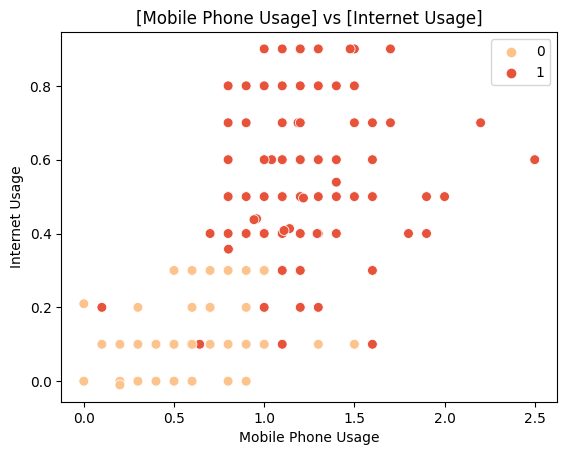

In [64]:

#3. "Mobile Phone Usage" vs "Internet Usage"

sns.scatterplot(x='Mobile Phone Usage',y='Internet Usage',hue = preds,data=df_k2, s=50,legend = True, palette='OrRd').set(title='[Mobile Phone Usage] vs [Internet Usage]')
